# S&P Data Analysis
The analysis of time series financial data.

## 1. Data Import and Cleaning

In [1]:
import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(20)

In [2]:
company_list = glob.glob(".\individual_stocks_5yr/*csv")

In [3]:
raw_data = pd.DataFrame()
for company in company_list:
    company_df = pd.read_csv(company, encoding = 'iso-8859-1', on_bad_lines = 'skip')
    raw_data = pd.concat([raw_data, company_df], ignore_index = True)

In [4]:
raw_data.shape

(619040, 7)

In [5]:
raw_data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [6]:
raw_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
raw_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
cleaned_data = raw_data.dropna()

In [9]:
cleaned_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

In [11]:
len(cleaned_data['Name'].unique())

505

## Price Change Analysis

### Sample companies to see the inter-company differences

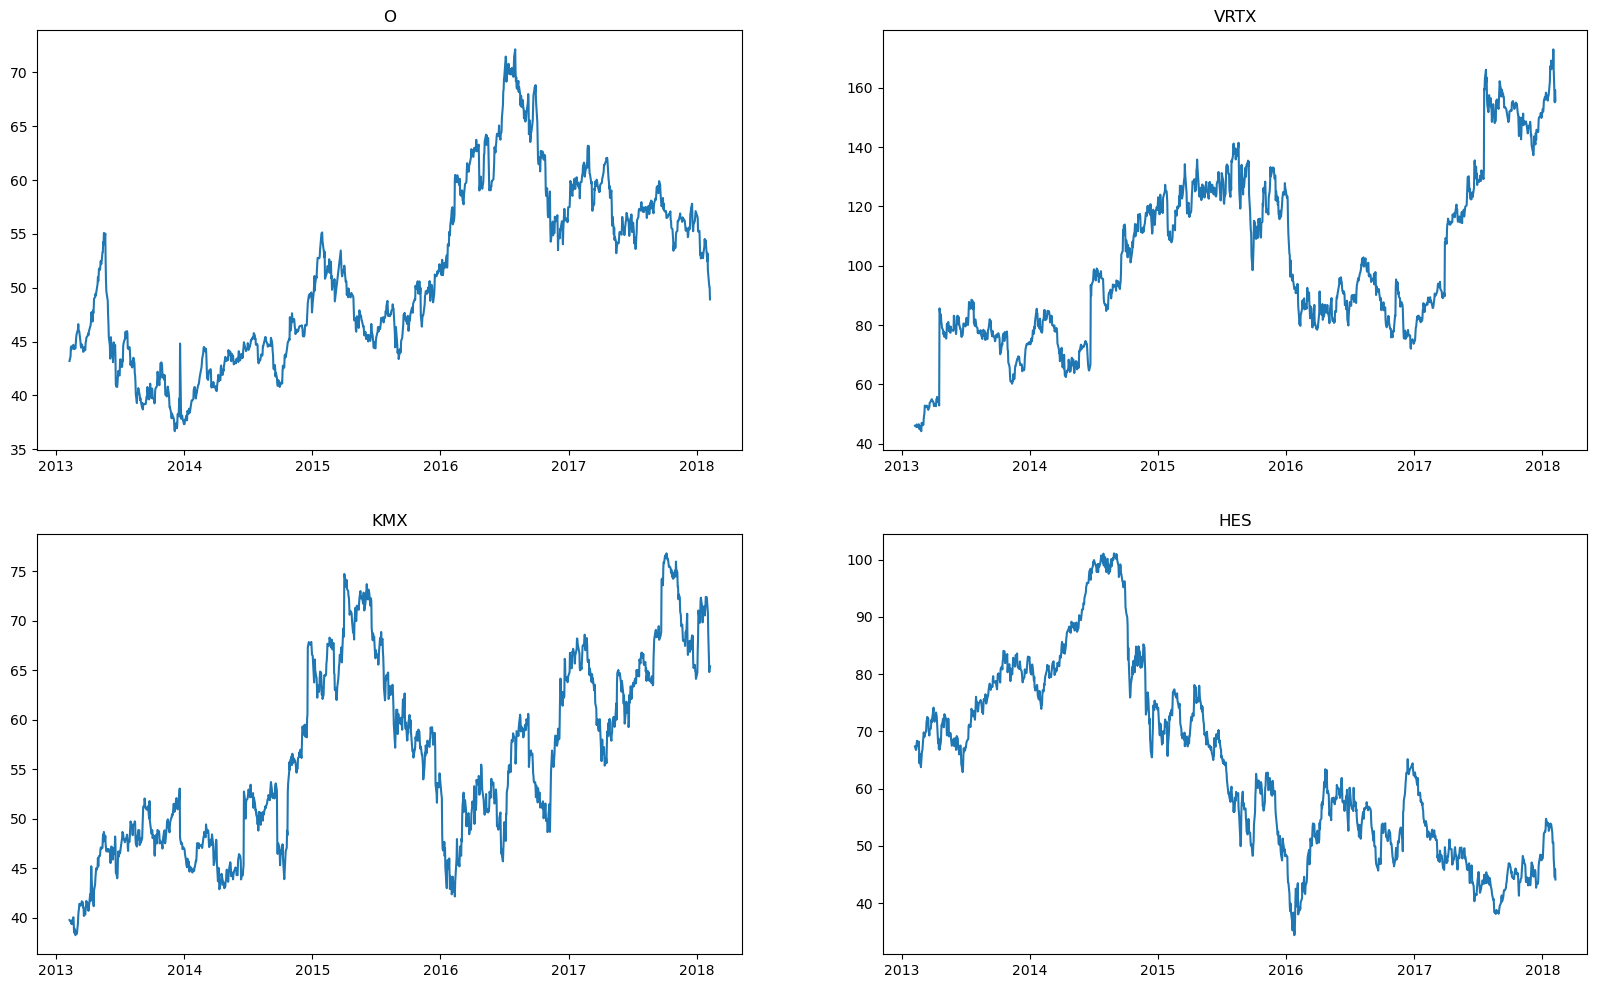

In [12]:
plt.figure(figsize = (20, 12))
sample_n = 4
for index, company_name in enumerate(np.random.choice(cleaned_data['Name'].unique(), sample_n), 1):
    plt.subplot(2,2, index)
    filter_lst = (cleaned_data['Name'] == company_name)
    subdata = cleaned_data[filter_lst]
    plt.plot(subdata['date'], subdata['close'])
    plt.title(company_name)

### Show the plot of entire dataset with mean close price

Text(0.5, 1.0, 'Mean Close Price agains Date')

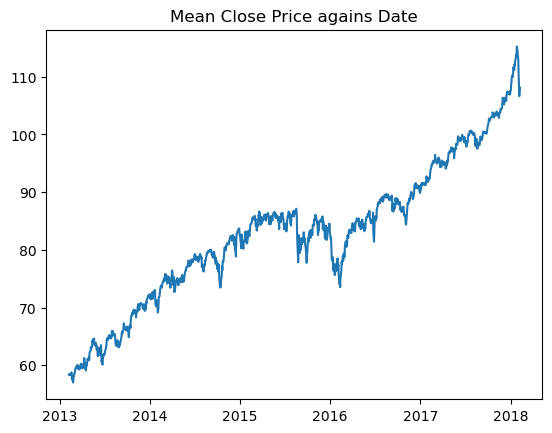

In [13]:
avg_close = cleaned_data[['date', 'close']].groupby('date')
avg_close = avg_close.mean().reset_index()

plt.plot(avg_close['date'], avg_close['close'])
plt.title('Mean Close Price agains Date')

### Plot the moving average
Use moving average to remove noises

In [14]:
rolling_data = cleaned_data.copy()
ma_day = [10, 20, 50]

for ma in ma_day:
    rolling_data['rolling_avg_close_' + str(ma)] = rolling_data['close'].rolling(ma).mean()

In [15]:
rolling_data.head

<bound method NDFrame.head of              date   open   high    low  close    volume Name  \
0      2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL   
1      2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL   
2      2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL   
3      2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL   
4      2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL   
...           ...    ...    ...    ...    ...       ...  ...   
619035 2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS   
619036 2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS   
619037 2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS   
619038 2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS   
619039 2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS   

        rolling_avg_close_10  rolling_avg_close_20  rolling_avg_close_50  
0                        NaN                   NaN                   NaN  
1                        NaN                   NaN 

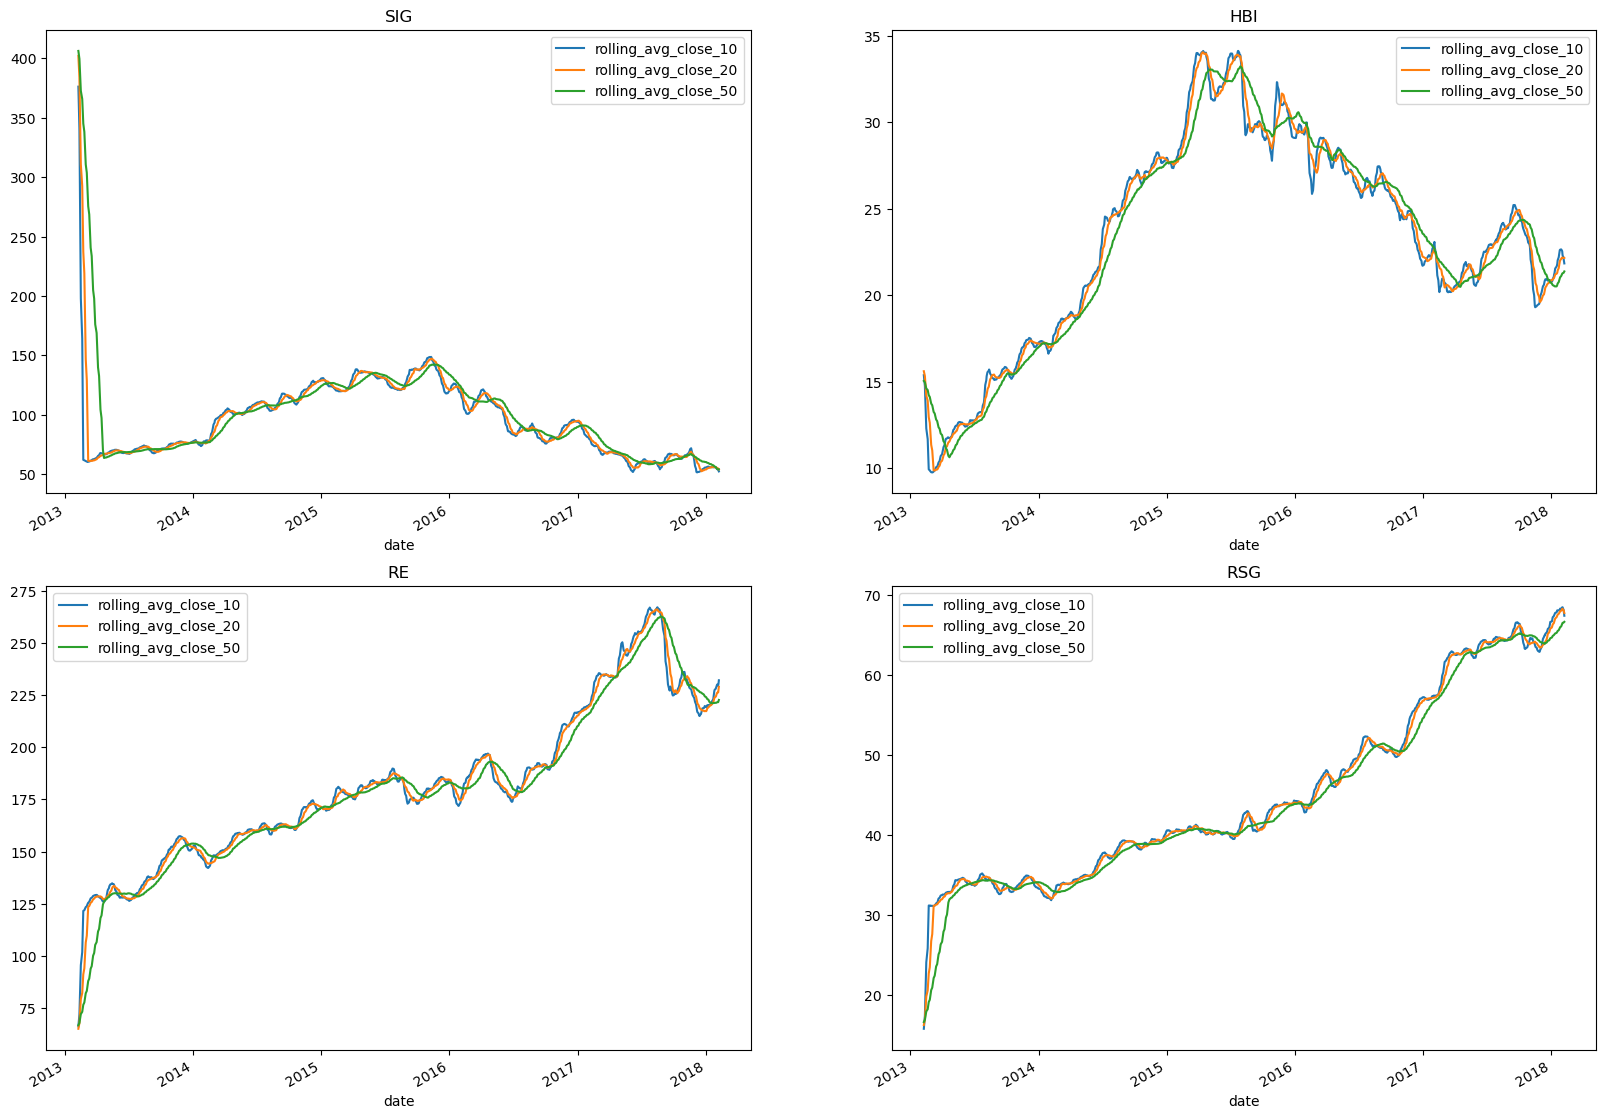

In [16]:
plt.figure(figsize = (20, 15))
for index, company_name in enumerate(np.random.choice(rolling_data['Name'].unique(), sample_n), 1):
    plt.subplot(2,2, index)
    filter_lst = (rolling_data['Name'] == company_name)
    subdata = rolling_data[filter_lst]
    subdata.plot(kind = 'line', x = 'date', y = ['rolling_avg_close_10', 'rolling_avg_close_20', 'rolling_avg_close_50'], ax = plt.gca())
    plt.title(company_name)

### Case study: Apple's daily return

In [17]:
apple_data = cleaned_data[cleaned_data['Name'] == 'AAPL']
apple_data = apple_data.sort_values(by = 'date').reset_index()

In [18]:
apple_data.head

<bound method NDFrame.head of       index       date      open      high       low     close     volume  \
0      1259 2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416   
1      1260 2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425   
2      1261 2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363   
3      1262 2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995   
4      1263 2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154   
...     ...        ...       ...       ...       ...       ...        ...   
1254   2513 2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787   
1255   2514 2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825   
1256   2515 2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522   
1257   2516 2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838   
1258   2517 2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580   

      Name  
0     AAPL  
1     AAPL  
2     

In [19]:
apple_data['Daily return (in %)'] = apple_data['close'].pct_change()*100

<Axes: xlabel='Daily return (in %)', ylabel='Density'>

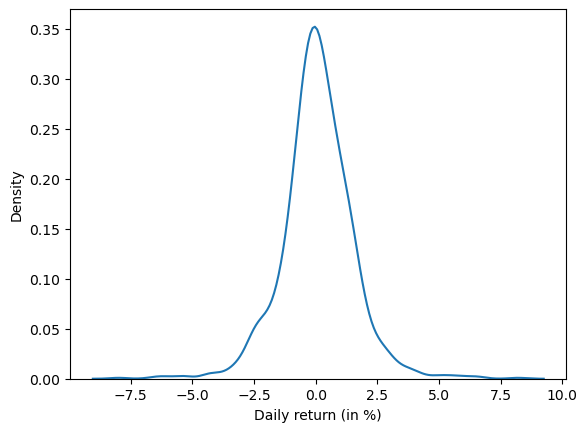

In [20]:
sb.kdeplot(apple_data, x = 'Daily return (in %)')

<Axes: ylabel='Daily return (in %)'>

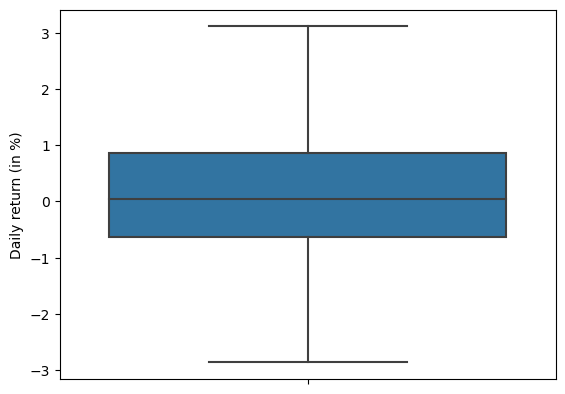

In [21]:
sb.boxplot(apple_data, y = 'Daily return (in %)', showfliers = False)

In [22]:
import plotly.express as px

In [23]:
px.line(apple_data, x = 'date', y = 'Daily return (in %)')

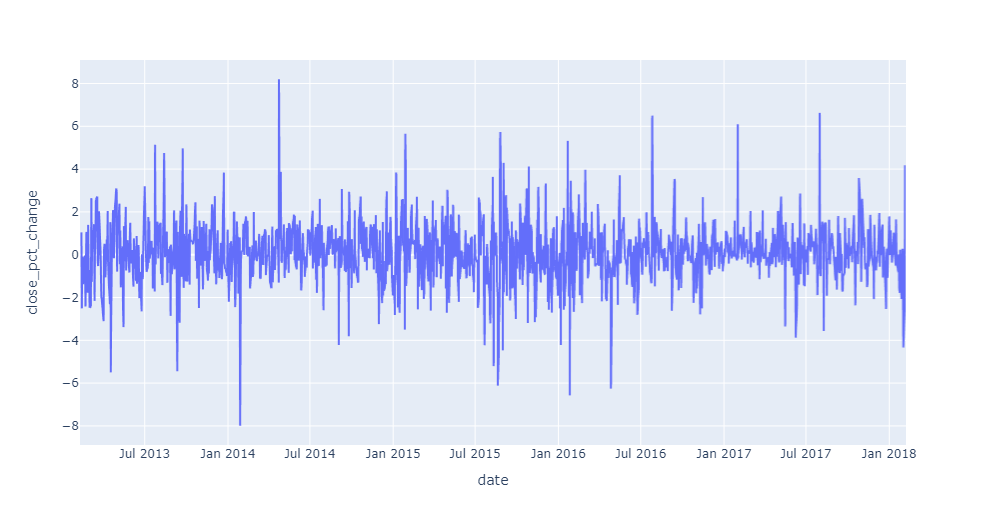

### Resampling analysis of closing price

In [24]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

In [25]:
apple_data.set_index('date', inplace = True)

In [26]:
apple_data.head(4)

index     open     high      low    close     volume  Name  \
date                                                                     
2013-02-08   1259  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11   1260  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12   1261  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13   1262  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return (in %)  
date                             
2013-02-08                  NaN  
2013-02-11             1.042235  
2013-02-12            -2.506658  
2013-02-13            -0.190297

Text(0.5, 1.0, 'Monthly Resampled Closing Price')

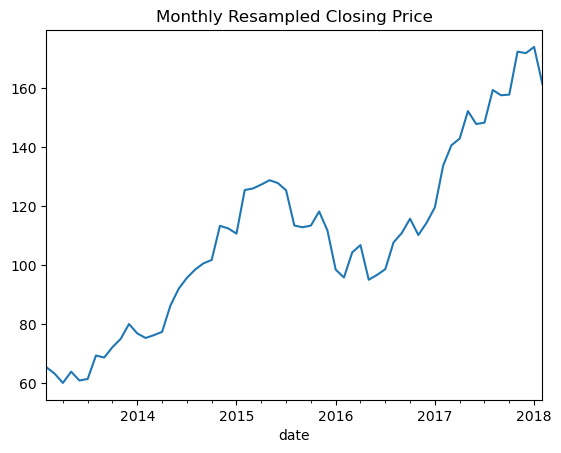

In [27]:
apple_data['close'].resample('M').mean().plot()
plt.title('Monthly Resampled Closing Price')

Text(0.5, 1.0, 'Yearly Resampled Closing Price')

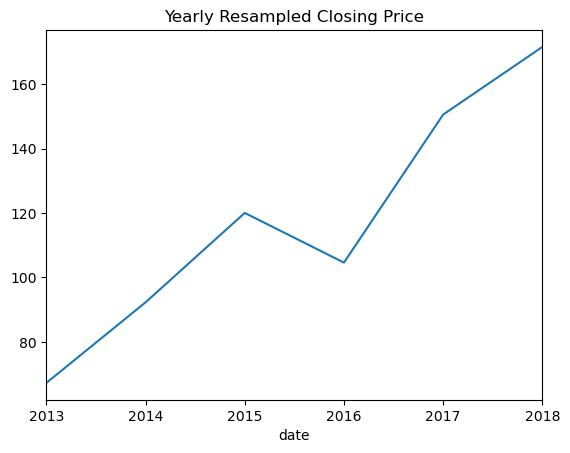

In [28]:
apple_data['close'].resample('Y').mean().plot()
plt.title('Yearly Resampled Closing Price')

Text(0.5, 1.0, 'Quarterly Resampled Closing Price')

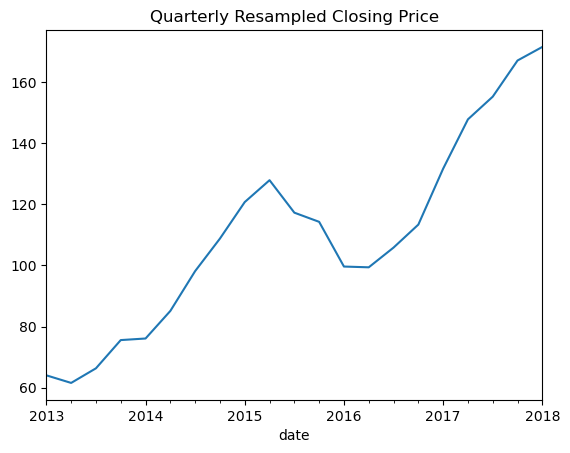

In [29]:
apple_data['close'].resample('Q').mean().plot()
plt.title('Quarterly Resampled Closing Price')

### Correlation Analysis of Closing Prices

In [30]:
sampled_company = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

In [31]:
apple = cleaned_data[cleaned_data['Name']==sampled_company[0]].reset_index()
amzn = cleaned_data[cleaned_data['Name']==sampled_company[1]].reset_index()
google = cleaned_data[cleaned_data['Name']==sampled_company[2]].reset_index()
msft = cleaned_data[cleaned_data['Name']==sampled_company[3]].reset_index()

In [32]:
closing_price = pd.DataFrame()

In [33]:
closing_price['apple_close'] = apple['close']
closing_price['amazon_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']
closing_price

apple_close  amazon_close  google_close  msft_close
0         67.8542        261.95        558.46       27.55
1         68.5614        257.21        559.99       27.86
2         66.8428        258.70        556.97       27.88
3         66.7156        269.47        567.16       28.03
4         66.6556        269.24        567.00       28.04
...           ...           ...           ...         ...
1254     167.7800       1390.00           NaN       94.26
1255     160.5000       1429.95           NaN       91.78
1256     156.4900       1390.00           NaN       88.00
1257     163.0300       1442.84           NaN       91.33
1258     159.5400       1416.78           NaN       89.61

[1259 rows x 4 columns]

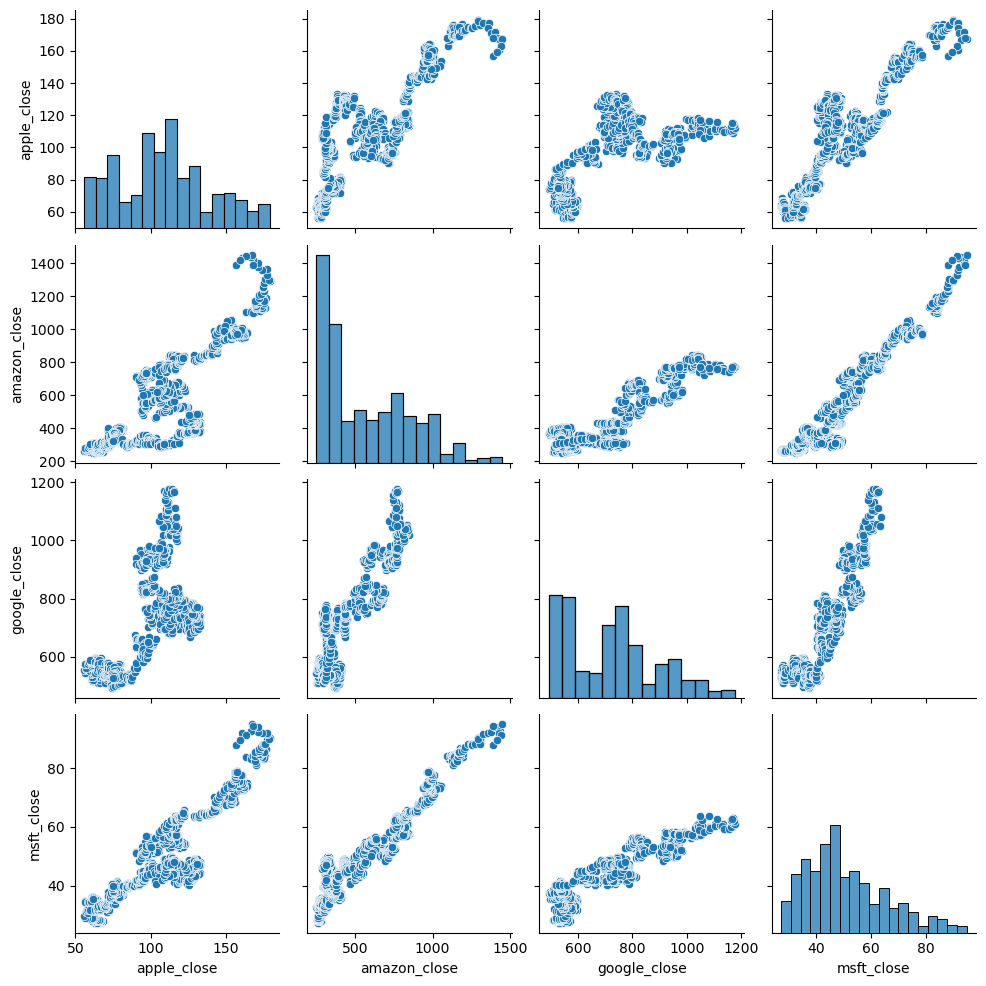

In [34]:
sb.pairplot(closing_price)

In [35]:
corr_matrix = closing_price.corr()

<Axes: >

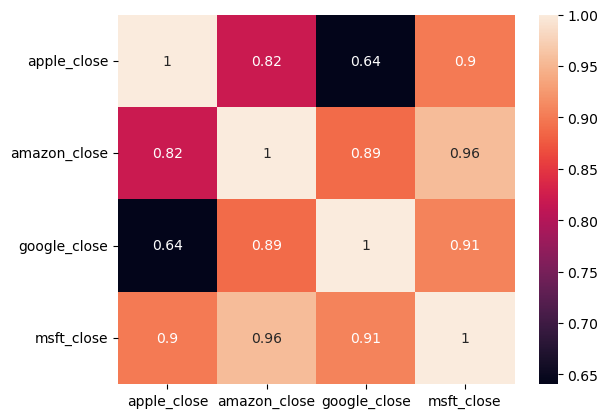

In [36]:
sb.heatmap(data = corr_matrix, annot = True)

In [37]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100
closing_price

apple_close  amazon_close  google_close  msft_close  \
0         67.8542        261.95        558.46       27.55   
1         68.5614        257.21        559.99       27.86   
2         66.8428        258.70        556.97       27.88   
3         66.7156        269.47        567.16       28.03   
4         66.6556        269.24        567.00       28.04   
...           ...           ...           ...         ...   
1254     167.7800       1390.00           NaN       94.26   
1255     160.5000       1429.95           NaN       91.78   
1256     156.4900       1390.00           NaN       88.00   
1257     163.0300       1442.84           NaN       91.33   
1258     159.5400       1416.78           NaN       89.61   

      apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      google_close_pct_change  msft_close_pct_change  
0                         NaN                    NaN  
1                    0.273968               1.125227  
2                   -0.539295               0.071788  
3                    1.829542               0.538020  
4                   -0.028211               0.035676  
...                       ...                    ...  
1254                      NaN              -0.789391  
1255                      NaN              -2.631021  
1256                      NaN              -4.118544  
1257                      NaN               3.784091  
1258                      NaN              -1.883280  

[1259 rows x 8 columns]

In [38]:
closing_price_change = closing_price[['apple_close_pct_change', 'amazon_close_pct_change', 'google_close_pct_change', 'msft_close_pct_change']]

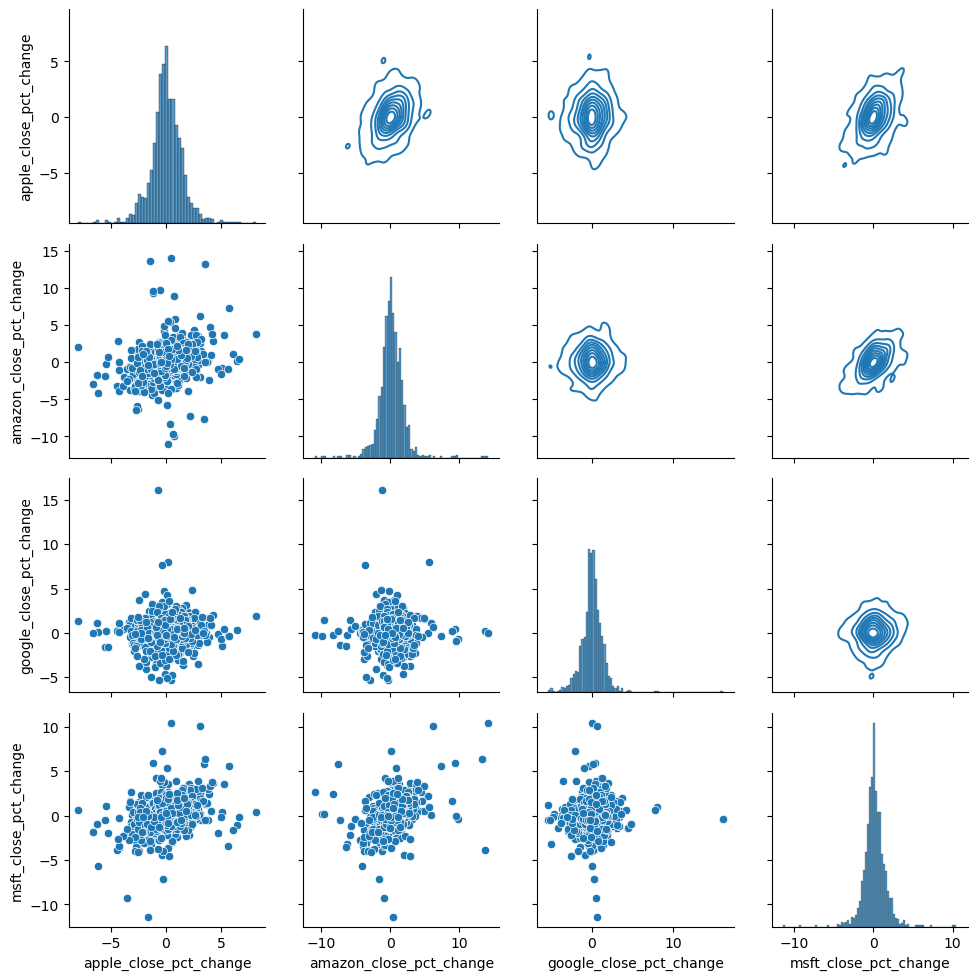

In [39]:
plot = sb.PairGrid(data = closing_price_change)
plot.map_diag(sb.histplot)
plot.map_lower(sb.scatterplot)
plot.map_upper(sb.kdeplot)

In [40]:
closing_price_change.corr()

apple_close_pct_change  amazon_close_pct_change  \
apple_close_pct_change                 1.000000                 0.287659   
amazon_close_pct_change                0.287659                 1.000000   
google_close_pct_change                0.036202                 0.027698   
msft_close_pct_change                  0.366598                 0.402678   

                         google_close_pct_change  msft_close_pct_change  
apple_close_pct_change                  0.036202               0.366598  
amazon_close_pct_change                 0.027698               0.402678  
google_close_pct_change                 1.000000               0.038939  
msft_close_pct_change                   0.038939               1.000000